In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

In [2]:
df=pd.read_csv("Student_Performance.csv")

In [3]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23
9996,7,64,Yes,8,5,58
9997,6,83,Yes,8,5,74
9998,9,97,Yes,7,0,95


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# sns.scatterplot(df,x="Sleep Hours",y="Performance Index")
# plt.show()

In [6]:
# df['Extracurricular Activities'].enumarate()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Hours Studied                     10000 non-null  int64 
 1   Previous Scores                   10000 non-null  int64 
 2   Extracurricular Activities        10000 non-null  object
 3   Sleep Hours                       10000 non-null  int64 
 4   Sample Question Papers Practiced  10000 non-null  int64 
 5   Performance Index                 10000 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 468.9+ KB


In [8]:
num_df=df.select_dtypes(include="number")

In [9]:
x=num_df.drop('Performance Index',axis=1)
y=df['Performance Index']


In [10]:
x

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
0,7,99,9,1
1,4,82,4,2
2,8,51,7,2
3,5,52,5,2
4,7,75,8,5
...,...,...,...,...
9995,1,49,4,2
9996,7,64,8,5
9997,6,83,8,5
9998,9,97,7,0


In [11]:
y

0       91
1       65
2       45
3       36
4       66
        ..
9995    23
9996    58
9997    74
9998    95
9999    64
Name: Performance Index, Length: 10000, dtype: int64

In [12]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=42)

In [13]:
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [14]:
model.intercept_

np.float64(-33.60206732749263)

In [15]:
model.coef_

array([2.85289351, 1.01703572, 0.47331832, 0.19172629])

In [16]:
y_pred=model.predict(xtest)
y_p=model.predict(xtrain)






In [17]:
y_pred

array([55.00786377, 22.31444624, 47.59404705, ..., 16.48182916,
       63.64243731, 46.23799491], shape=(2000,))

In [18]:
model.score(xtest,ytest)
model.score(xtrain,ytrain)

0.9884388348325367

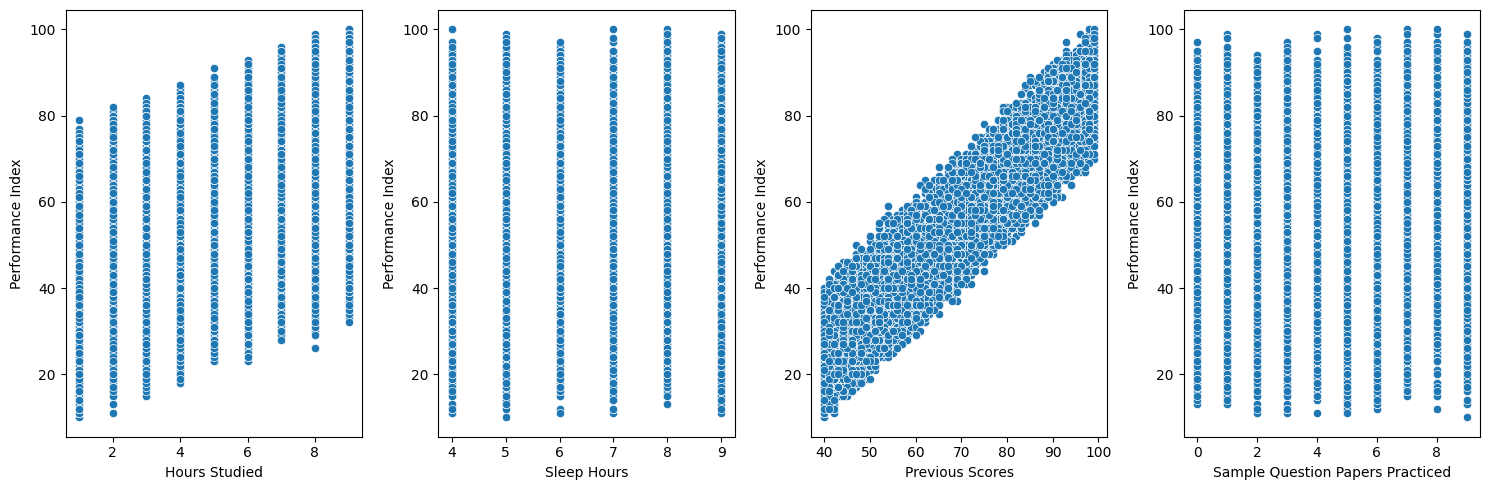

In [19]:
fig,a=plt.subplots(ncols=4,figsize=(15,5))
sns.scatterplot(df,x="Hours Studied",y="Performance Index",ax=a[0])
sns.scatterplot(df,x="Sleep Hours",y="Performance Index",ax=a[1])
sns.scatterplot(df,x="Previous Scores",y="Performance Index",ax=a[2])
sns.scatterplot(df,x="Sample Question Papers Practiced",y="Performance Index",ax=a[3])
plt.tight_layout()
plt.show()

In [20]:
num_df.corr()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.005944,0.007888,0.915189
Sleep Hours,0.001245,0.005944,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.048106,0.043268,1.000000


In [21]:
num_df.corr()['Performance Index']

Hours Studied                       0.373730
Previous Scores                     0.915189
Sleep Hours                         0.048106
Sample Question Papers Practiced    0.043268
Performance Index                   1.000000
Name: Performance Index, dtype: float64

In [22]:
from sklearn.metrics import r2_score,mean_squared_error,root_mean_squared_error #it contain evaluation methods

In [23]:
print(r2_score(ytest,y_pred))
print(r2_score(ytrain,y_p))

0.9887144552384186
0.9884388348325367


In [24]:
mean_squared_error(ytest,y_pred)

4.182254914593818

In [25]:
mean_squared_error(ytest,y_pred)

4.182254914593818

In [26]:
mean_squared_error(ytest,y_pred)

4.182254914593818

In [27]:
rmse=root_mean_squared_error(ytest,y_pred)
#np.sqrt(mse)
rmse

2.0450562130645253

In [28]:
#calucalate the avg of actual output
target_mean=ytest.mean()
target_mean

np.float64(54.878)

In [29]:
mse_evaluation=rmse/target_mean
mse_evaluation

np.float64(0.03726550189628859)